In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the csv file 
df = pd.read_csv("Admission_Predict.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Let's drop the serial no.
df.drop('Serial No.', axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## PERFORM EXPLORATORY DATA ANALYSIS

In [9]:
# checking the null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
# Statistical summary of the dataframe
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
# Grouping by University ranking 
df_university = df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


## PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C87EF33388>,
      dtype=object)

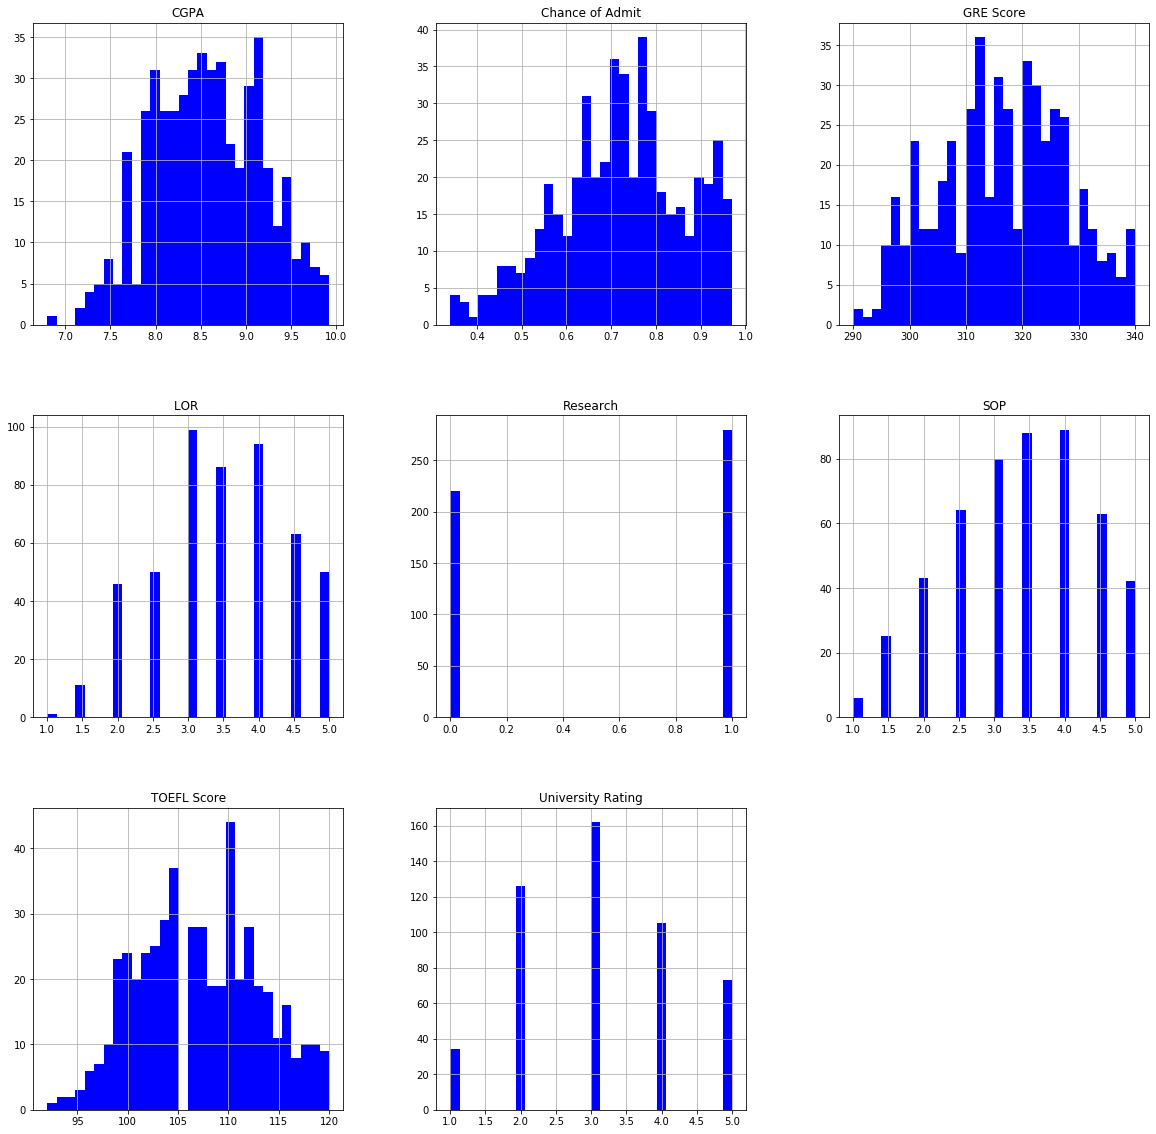

In [13]:
df.hist(bins = 30, figsize=(20,20), color='blue')

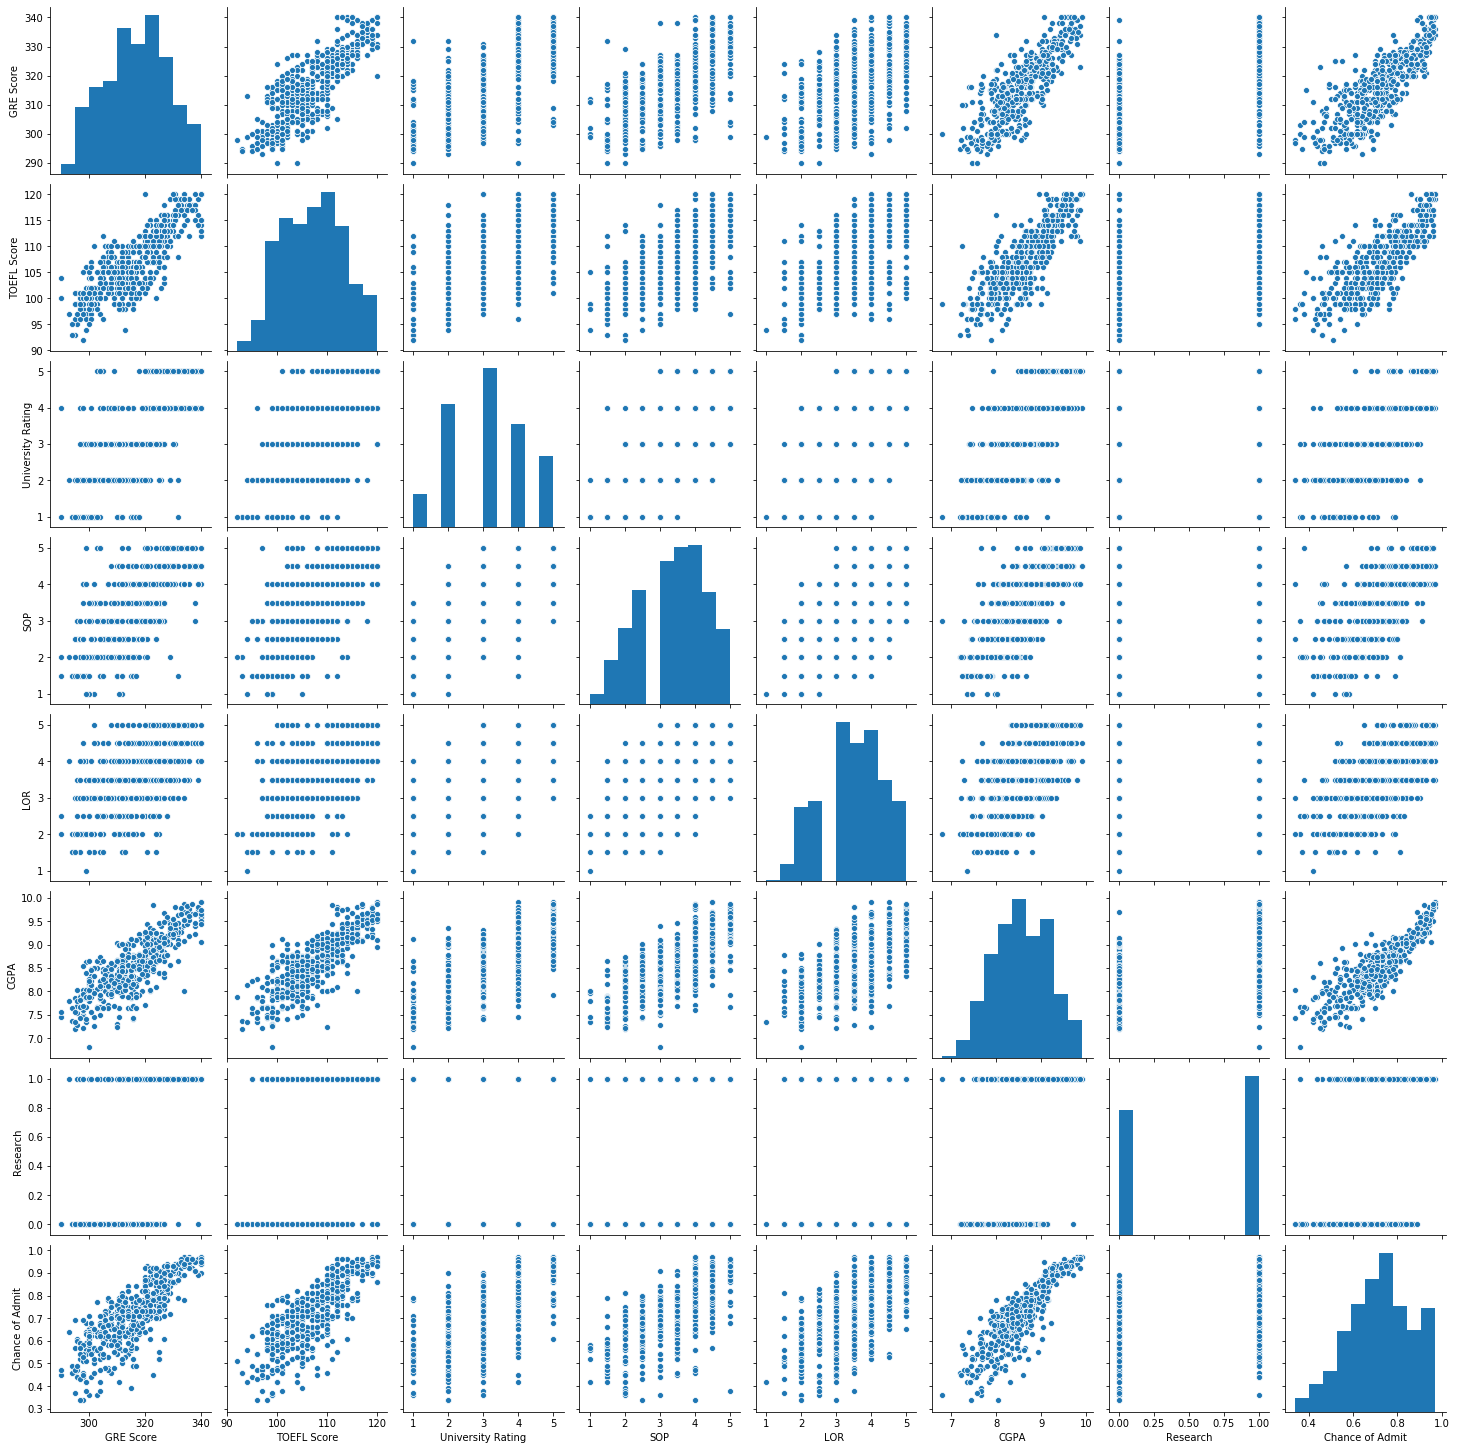

In [14]:
sns.pairplot(df)

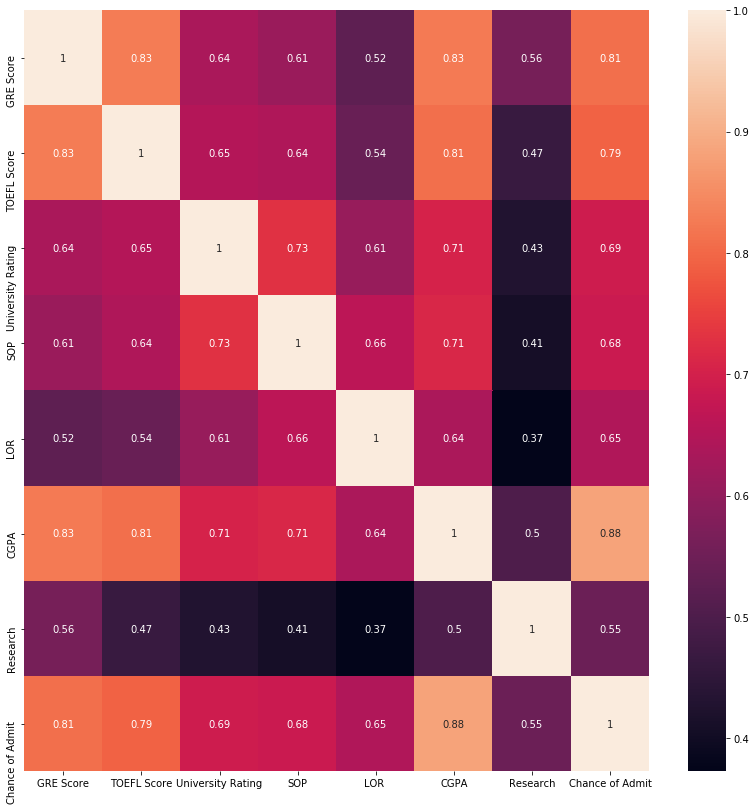

In [15]:
corr_matrix = df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr_matrix, annot = True)
plt.show()
  

## CREATE TRAINING AND TESTING DATASET

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
x = df.drop(columns = ['Chance of Admit'])

In [18]:
y = df['Chance of Admit']

In [19]:
x.shape

(500, 7)

In [20]:
y.shape

(500,)

In [21]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [22]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [23]:
x = np.array(x)
y = np.array(y)

In [24]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [25]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [57]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [27]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15)

## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [29]:
lr_Model = LinearRegression()
lr_Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
acc_lr = lr_Model.score(x_test, y_test)
acc_lr

0.8575382437657619

## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [37]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
____

In [38]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [40]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/100
340/340 [==============================] - 1s 4ms/sample - loss: 0.5196 - val_loss: 0.2870
Epoch 2/100
340/340 [==============================] - 0s 491us/sample - loss: 0.3928 - val_loss: 0.3043
Epoch 3/100
340/340 [==============================] - 0s 503us/sample - loss: 0.3500 - val_loss: 0.2689
Epoch 4/100
340/340 [==============================] - 0s 512us/sample - loss: 0.2590 - val_loss: 0.2935
Epoch 5/100
340/340 [==============================] - 0s 524us/sample - loss: 0.2759 - val_loss: 0.2601
Epoch 6/100
340/340 [==============================] - 0s 518us/sample - loss: 0.2625 - val_loss: 0.3242
Epoch 7/100
340/340 [==============================] - 0s 530us/sample - loss: 0.2518 - val_loss: 0.2698
Epoch 8/100
340/340 [==============================] - 0s 524us/sample - loss: 0.2621 - val_loss: 0.2687
Epoch 9/100
340/340 [==============================] - 0s 512us/sample - loss: 0.2287 - val_loss: 0.2950
Epoch 10/100

In [41]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 267us/sample - loss: 0.2698
Accuracy : 0.7302022794882457


In [42]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

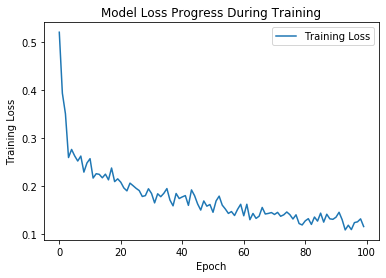

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [44]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.

from sklearn.tree import DecisionTreeRegressor
DT_Model = DecisionTreeRegressor()
DT_Model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
accuracy_DT = DT_Model.score(x_test,y_test)
accuracy_DT

0.6849501284870321

In [47]:
from sklearn.ensemble import RandomForestRegressor
RandomF_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomF_model.fit(x_train,y_train)

C:\Users\MUKESH\AppData\Local\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## CALCULATE REGRESSION MODEL KPIs

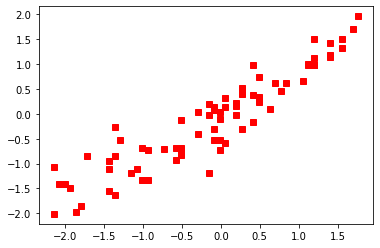

In [55]:
y_predict = lr_Model.predict(x_test)
plt.plot(y_test, y_predict, 's', color='r')

In [58]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

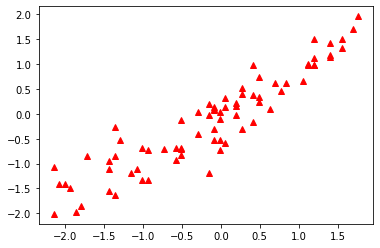

In [60]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')

In [62]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.392 
MSE = 0.15387743314337976 
MAE = 0.30189561568195017 
R2 = 0.857538243765762 
Adjusted R2 = 0.842654179681588
